In [1]:
import kagglehub
path = kagglehub.dataset_download("salader/dogsvscats")

Using Colab cache for faster access to the 'dogsvscats' dataset.


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
import os

# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = os.path.join(path, 'train'),
    labels = 'inferred',
    label_mode = 'int', # to set cat as 0 and dog as 1
    batch_size = 32, # provide training in batches
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = os.path.join(path, 'test'),
    labels = 'inferred',
    label_mode = 'int', # to set cat as 0 and dog as 1
    batch_size = 32, # provide training in batches
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255, tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
# creating CNN model
model = Sequential([
    Conv2D(32, kernel_size = (3,3), padding = 'valid',activation = 'relu',input_shape = (256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    Conv2D(64, kernel_size = (3,3), padding = 'valid',activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    Conv2D(128, kernel_size = (3,3), padding = 'valid',activation = 'relu'),
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    Flatten(),

    Dense(128, activation = 'relu'),
    Dropout(0.1),
    Dense(64, activation = 'relu'),
    Dropout(0.1),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,681 (56.64 MB)

 Trainable params: 14,847,489 (56.64 MB)

 Non-trainable params: 192 (768.00 B)

In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [8]:
history = model.fit(train_ds,epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 90ms/step - accuracy: 0.5578 - loss: 1.8746 - val_accuracy: 0.6102 - val_loss: 0.6367
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.6615 - loss: 0.6177 - val_accuracy: 0.7110 - val_loss: 0.5756
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.7088 - loss: 0.5548 - val_accuracy: 0.6892 - val_loss: 0.6043
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.7576 - loss: 0.4951 - val_accuracy: 0.7710 - val_loss: 0.4819
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7956 - loss: 0.4338 - val_accuracy: 0.7946 - val_loss: 0.4863
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.8255 - loss: 0.3799 - val_accuracy: 0.7842 - val_loss: 0.4753
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8553 - loss: 0.3235 - val_accuracy: 0.8058 - val_loss: 0.4857
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.8786 - loss: 0.2791 - 

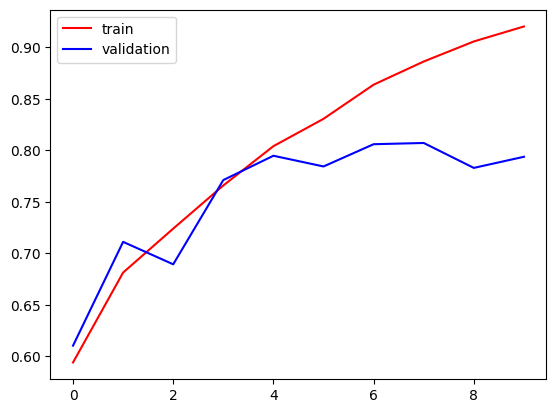

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

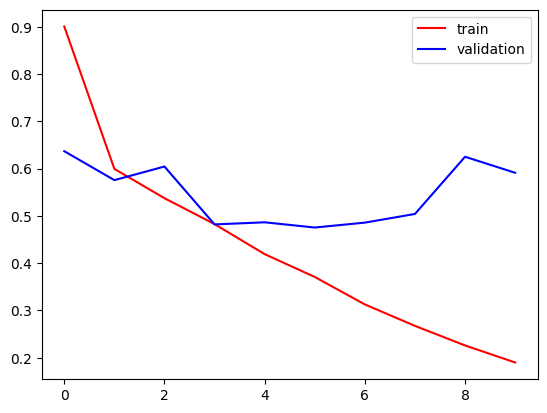

In [10]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [11]:
import cv2

In [81]:
test_img = cv2.imread('/content/cat.webp')

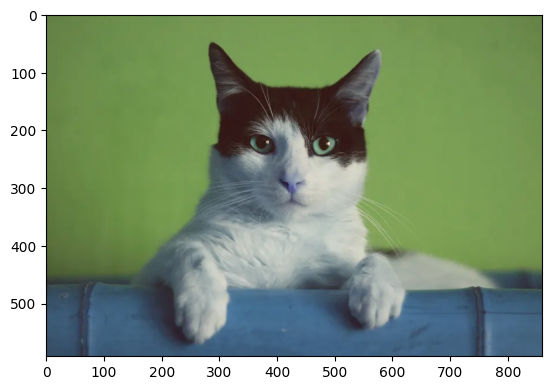

In [82]:
plt.imshow(test_img)



In [83]:
test_img.shape

(592, 860, 3)

In [84]:
test_img = cv2.resize(test_img,(256,256))

In [85]:
test_input = test_img.reshape((1,256,256,3))

In [86]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)

In [87]:
prediction = model.predict(test_input)[0][0]

if prediction > 0.5:
    print(f"The model predicts a Dog with probability: {prediction:.4f}")
else:
    print(f"The model predicts a Cat with probability: {1 - prediction:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The model predicts a Cat with probability: 1.0000
